## 1) Loading the Libraries

Loading all the needed libraries for the project, this was done extracting all the libraries used in the Evaluation and Validation file from ML2, probably not all of the are going to be used.

In [3]:

import random
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from copy import copy
from collections import Counter
from dataset import Dataset as dataset
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import NearMiss
from scipy.stats import kruskal
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef, precision_score
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from tqdm import tqdm_notebook
from typing import List


C:\Users\Guille\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## 2) Loading the Libraries

To load the data, this date was loaded in a github repository that we will use to call the URL of the data

In [19]:

URL="https://raw.githubusercontent.com/GuilleChacon/Machine-Learning-II/master/turnover.csv"
HR = dataset(URL, delimiter=',', header=0)

## 3) Exploration of Data

Perform basic operations to understand the data as is before doing some preparation

In [116]:
HR.features.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,1.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,6.0,0.0,1.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,1.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,5.0,0.0,1.0,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0.0,1.0,0.0,sales,low
5,0.41,0.50,2.0,153.0,3.0,0.0,1.0,0.0,sales,low
6,0.10,0.77,6.0,247.0,4.0,0.0,1.0,0.0,sales,low
7,0.92,0.85,5.0,259.0,5.0,0.0,1.0,0.0,sales,low
8,0.89,1.00,5.0,224.0,5.0,0.0,1.0,0.0,sales,low
9,0.42,0.53,2.0,142.0,3.0,0.0,1.0,0.0,sales,low


In [124]:
HR.describe()

10 Features. 14999 Samples
Available types: [dtype('float64') dtype('O')]
  · 2 categorical features
  · 8 numerical features
  · 0 categorical features with NAs
  · 0 numerical features with NAs
  · 10 Complete features
--
Target: Not set


In [129]:
HR.summary()

Features Summary (all):
'satisfaction_level'   : float64    Min.(0.09) 1stQ(0.44) Med.(0.64) Mean(0.61) 3rdQ(0.82) Max.(1.0)
'last_evaluation'      : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project'       : float64    Min.(2.0) 1stQ(3.0) Med.(4.0) Mean(3.80) 3rdQ(5.0) Max.(7.0)
'average_montly_hours' : float64    Min.(96.0) 1stQ(156.) Med.(200.) Mean(201.) 3rdQ(245.) Max.(310.)
'time_spend_company'   : float64    Min.(2.0) 1stQ(3.0) Med.(3.0) Mean(3.49) 3rdQ(4.0) Max.(10.0)
'Work_accident'        : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'left'                 : object     2 categs. '1.0'(11428, 0.7619) '0.0'(3571, 0.2381) 
'promotion_last_5years': float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'sales'                : object     10 categs. 'sales'(4140, 0.2760) 'accounting'(2720, 0.1813) 'hr'(2229, 0.1486) 'technical'(1227, 0.0818) ...
'salary'               : object     3 categs. 'low

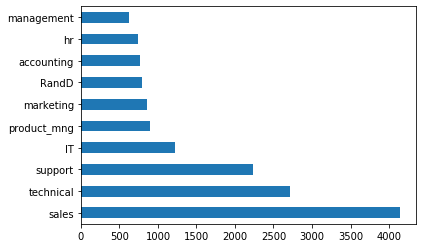

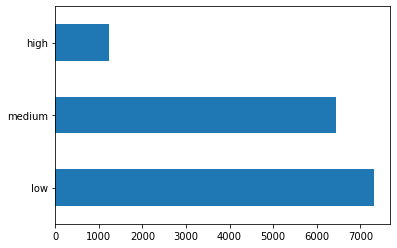

In [155]:
# Plotting the distribution of the categorical variables

for i in HR.categorical_features:
    plot = HR.features[i].value_counts().plot(kind='barh')
    plt.title(i)
    plt.show()

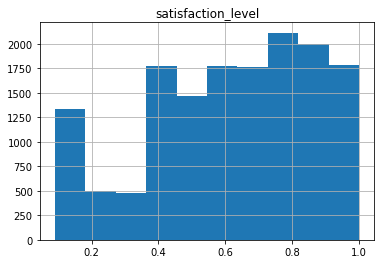

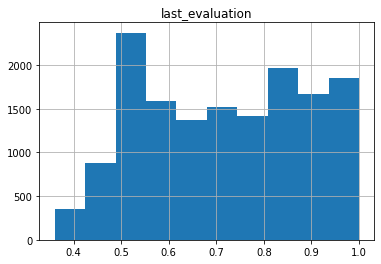

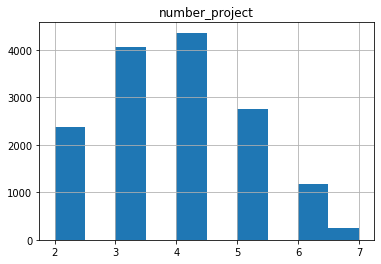

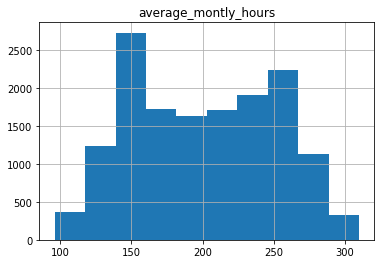

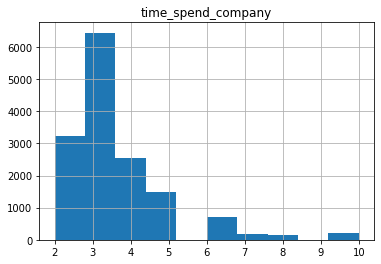

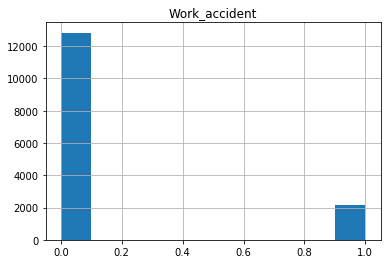

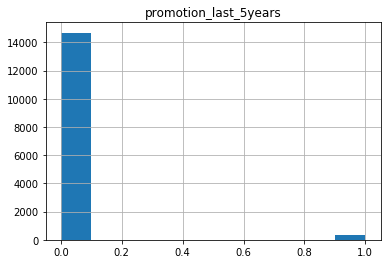

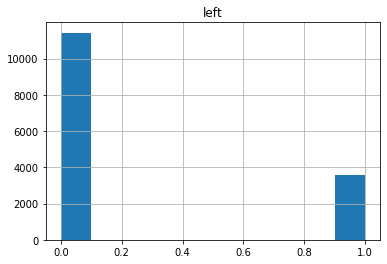

In [57]:
#Plotting the Histogram for each numerical feature

for i in HR.numerical_features:
    HR.features.hist(i)

In [59]:
#Checking for Null Values

HR.nas()

[]

In [6]:
#Calculating the Correlation between numerical Varaibles

HR.numerical_correlated(threshold=0.1)

(['last_evaluation',
  'number_project',
  'average_montly_hours',
  'time_spend_company',
  'left'],
                        satisfaction_level  last_evaluation  number_project  \
 satisfaction_level               1.000000         0.162407        0.005786   
 last_evaluation                  0.162407         1.000000        0.350399   
 number_project                   0.005786         0.350399        1.000000   
 average_montly_hours             0.062000         0.342061        0.397855   
 time_spend_company               0.139428         0.161154        0.251971   
 Work_accident                    0.056333         0.005767        0.002328   
 left                             0.365842         0.002440        0.019544   
 promotion_last_5years            0.022306         0.007167        0.002960   
 
                        average_montly_hours  time_spend_company  \
 satisfaction_level                 0.062000            0.139428   
 last_evaluation                    0.342061     

In [127]:
#Correlation between cathegorical varaibles

HR.to_categorical('left').categorical_correlated(threshold=0.1)

(['salary'],             left     sales    salary
 left    1.000000  0.072035  0.159013
 sales   0.072035  1.000000  0.150892
 salary  0.159013  0.150892  1.000000)

In [134]:
#reloading data set to avoid having "left" as cathergorical

HR = dataset(URL, delimiter=',', header=0)

## 3) Preparation of Data

In this section we will run the code to prepare the data for the model, the final output will be a function to reset all the data into preparation mode

In [324]:
HR = dataset(URL, delimiter=',', header=0)

In [325]:
HR.set_target('left');

In [326]:
#Check for underepresented

HR.under_represented_features()

[]

In [328]:
# turn Number of Project, promotion_last_5years, Work_accident  
## We include Time_spend_company because dsicretize doesn't work

HR.to_categorical(['number_project', 'promotion_last_5years' , 'Work_accident' , 'time_spend_company'])

In [337]:
# Binarize time spend in company didn't work so we'll use merge for Time Spend Company

### HR.to_int('time_spend_company').discretize('time_spend_company', [(0, 2),(2, 5),(5, 10)], category_names=['low', 'mid', 'high']).summary()

HR.merge_categories(column='time_spend_company', old_values=['0.0', '1.0', '2.0'], new_value='low')
HR.merge_categories(column='time_spend_company', old_values=['3.0', '4.0', '5.0'], new_value='mid')
HR.merge_categories(column='time_spend_company', old_values=['6.0', '7.0', '8.0', '9.0', '10.0'], new_value='high')

HR.summary()

Features Summary (all):
'satisfaction_level'   : float64    Min.(-1.8) 1stQ(-0.7) Med.(-0.0) Mean(-1.9) 3rdQ(0.83) Max.(1.81)
'last_evaluation'      : float64    Min.(-2.0) 1stQ(-0.9) Med.(0.02) Mean(-6.5) 3rdQ(0.89) Max.(1.64)
'number_project'       : object     6 categs. '2.0'(4365, 0.2910) '5.0'(4055, 0.2704) '7.0'(2761, 0.1841) '6.0'(2388, 0.1592) ...
'average_montly_hours' : float64    Min.(-2.2) 1stQ(-0.8) Med.(0.02) Mean(5.83) 3rdQ(0.88) Max.(2.04)
'time_spend_company'   : object     3 categs. 'mid'(10473, 0.6982) 'high'(3244, 0.2163) 'low'(1282, 0.0855) 
'Work_accident'        : object     2 categs. '0.0'(12830, 0.8554) '1.0'(2169, 0.1446) 
'promotion_last_5years': object     2 categs. '0.0'(14680, 0.9787) '1.0'(319, 0.0213) 
'sales'                : object     10 categs. 'sales'(4140, 0.2760) 'accounting'(2720, 0.1813) 'hr'(2229, 0.1486) 'technical'(1227, 0.0818) ...
'salary'               : object     3 categs. 'low'(7316, 0.4878) 'medium'(6446, 0.4298) 'high'(1237, 0.0825) 


In [338]:
HR.features.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,-0.991708,-1.087970,2.0,-0.868374,mid,0.0,0.0,sales,low
1,0.734344,0.842035,5.0,1.198550,high,0.0,0.0,sales,medium
2,-1.757358,0.957707,7.0,1.378741,mid,0.0,0.0,sales,medium


In [330]:
HR.numerical_features

['satisfaction_level', 'last_evaluation', 'average_montly_hours']

In [333]:
HR.fix_skewness()
HR.scale()

In [339]:
HR.features.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,-0.991708,-1.087970,2.0,-0.868374,mid,0.0,0.0,sales,low
1,0.734344,0.842035,5.0,1.198550,high,0.0,0.0,sales,medium
2,-1.757358,0.957707,7.0,1.378741,mid,0.0,0.0,sales,medium
3,0.351037,0.899889,5.0,0.471775,mid,0.0,0.0,sales,low
4,-1.024570,-1.147137,2.0,-0.825205,mid,0.0,0.0,sales,low
5,-0.890946,-1.265603,2.0,-0.955282,mid,0.0,0.0,sales,low
6,-1.781070,0.319768,6.0,0.923752,mid,0.0,0.0,sales,low
7,1.360673,0.784147,5.0,1.144033,mid,0.0,0.0,sales,low
8,1.198200,1.648918,5.0,0.490931,mid,0.0,0.0,sales,low
9,-0.856628,-1.087970,2.0,-1.198409,mid,0.0,0.0,sales,low


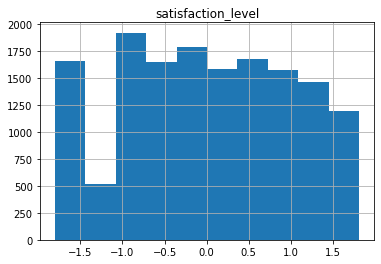

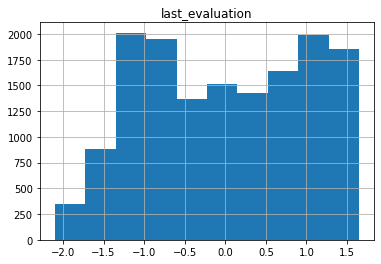

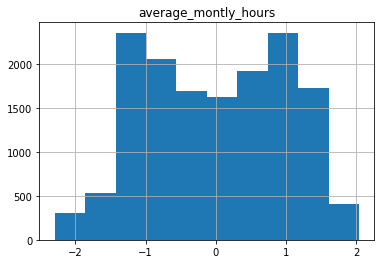

In [340]:
## Check new graphs

for i in HR.numerical_features:
    HR.features.hist(i)

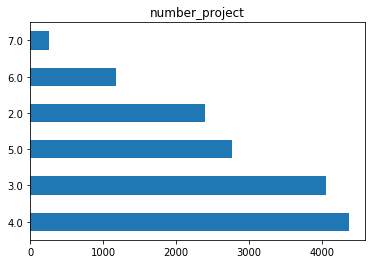

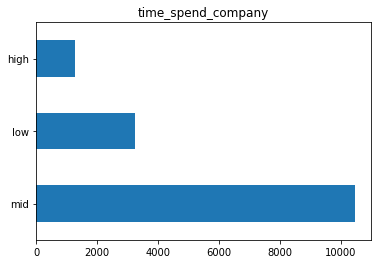

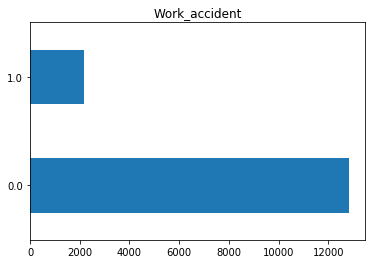

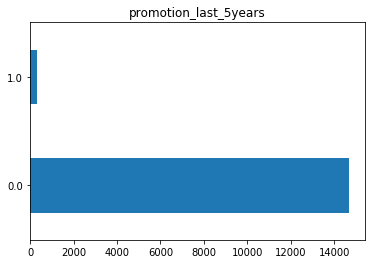

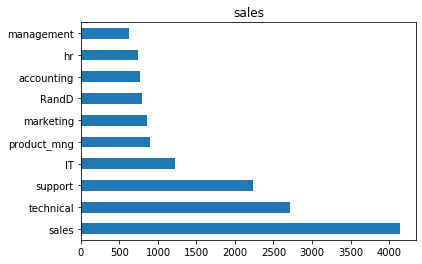

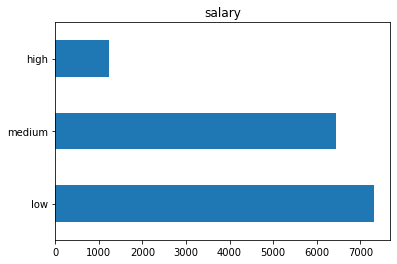

In [342]:
for i in HR.categorical_features:
    plot = HR.features[i].value_counts().plot(kind='barh')
    plt.title(i)
    plt.show()

In [343]:
HR.categorical_features

['number_project',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'sales',
 'salary']

In [345]:
HR.numerical_features

['satisfaction_level', 'last_evaluation', 'average_montly_hours']

In [347]:
HR.onehot_encode(HR.names('categorical'));

In [348]:
HR.summary()

Features Summary (all):
'average_montly_hours'     : float64    Min.(-2.2) 1stQ(-0.8) Med.(0.02) Mean(5.83) 3rdQ(0.88) Max.(2.04)
'last_evaluation'          : float64    Min.(-2.0) 1stQ(-0.9) Med.(0.02) Mean(-6.5) 3rdQ(0.89) Max.(1.64)
'satisfaction_level'       : float64    Min.(-1.8) 1stQ(-0.7) Med.(-0.0) Mean(-1.9) 3rdQ(0.83) Max.(1.81)
'number_project_2.0'       : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.15) 3rdQ(0.0) Max.(1.0)
'number_project_3.0'       : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.27) 3rdQ(1.0) Max.(1.0)
'number_project_4.0'       : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.29) 3rdQ(1.0) Max.(1.0)
'number_project_5.0'       : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.18) 3rdQ(0.0) Max.(1.0)
'number_project_6.0'       : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.07) 3rdQ(0.0) Max.(1.0)
'number_project_7.0'       : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.01) 3rdQ(0.0) Max.(1.0)
'time_spend_company_high'  : float64    Min.(0.0) 1s

## 4) Baseline Model

In this section we will run the code to prepare the data for the model, the final output will be a function to reset all the data into preparation mode

In [352]:
X, y = HR.split(test_size=0.2)

In [360]:
def evaluate_LogReg(X_train, y_train, X_test, y_test, 
                    return_score='F1',
                    printout=False):
    """
    Fits a logistic regression with the training set, and evaluates it with 
    the test set, using Accuracy, F1, Recall or MCC metrics

    """
    lr = LogisticRegression().fit(X_train, y_train)
    y_hat = lr.predict(X_test)

    accuracy = accuracy_score(y_test, y_hat)
    F1 = f1_score(y_test, y_hat)
    precision = precision_score(y_test, y_hat)
    recall = recall_score(y_test, y_hat)
    MCC = matthews_corrcoef(y_test, y_hat)
    
    if printout is True:
        print('Accuracy:', accuracy)
        print('F1:', F1)
        print('Precision:', precision)
        print('Recall:', recall)
        print('MCC:', MCC)
    
    return eval(return_score)

In [362]:
baselinemodel = LogisticRegression().fit(X.train, y.train)
pred_baseline = baselinemodel.predict(X.test)

random_oversample = evaluate_LogReg(X.train, y.train, X.test, y.test, printout=True)

Accuracy: 0.8793333333333333
F1: 0.7154088050314465
Precision: 0.7844827586206896
Recall: 0.6575144508670521
MCC: 0.6436091203639493


0.7154088050314465

In [20]:
HR.discretize('time_spend_company', [(0, 2),(2, 5),(5, 10)], category_names=['low', 'mid', 'high'])

HR.numerical.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2.0,157.0,mid,0.0,1.0,0.0
1,0.80,0.86,5.0,262.0,high,0.0,1.0,0.0
2,0.11,0.88,7.0,272.0,mid,0.0,1.0,0.0
